In [17]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [21]:
# Read in the california housing data set
california_data = pd.read_csv('../Resources/California_Housing.csv')
california_data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41


In [35]:
# Determine which measure of central tendency is most appropriate to describe the Population
california_pop = california_data['Population']
print(np.mean(california_pop))
print(np.median(california_pop))
sts.mode(california_pop)

1387.9633333333334
1152.5


ModeResult(mode=array([1128.]), count=array([8]))

NormaltestResult(statistic=5.011780248122047, pvalue=0.08160292891736927)


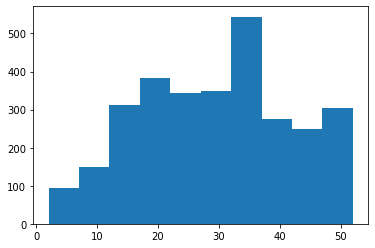

In [43]:
# Determine if the house age in California is considered normally distributed
california_house = california_data['HouseAge']
plt.hist(california_house)
print(sts.normaltest(california_house.sample(100)))

1.0606060606060606
502.46153846153845
The lower quartile of occupancy is: 2.4250909806040477
The upper quartile of occupancy is: 3.2974592743428355
The interquartile range of occupancy is: 0.8723682937387878
The median of occupancy is: 2.81970199317512
Values below 1.116538539995866 could be outliers.
Values below 4.606011714951017 could be outliers.


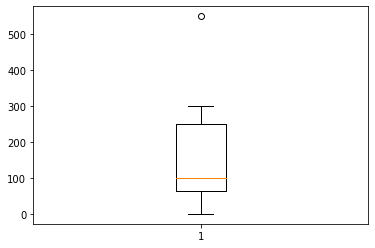

In [36]:
# Determine if there are any potential outliers in the average occupancy in California
california_avg_age = california_data['AveOccup']
print(california_avg_age.min())
print(california_avg_age.max())
times = [0, 50, 75, 100, 200, 300, 550]
fig1, ax1 = plt.subplots()
ax1.boxplot(times)

quartiles = california_data['AveOccup'].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f'The lower quartile of occupancy is: {lowerq}')
print(f'The upper quartile of occupancy is: {upperq}')
print(f'The interquartile range of occupancy is: {iqr}')
print(f'The median of occupancy is: {quartiles[0.5]}')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'Values below {lower_bound} could be outliers.')
print(f'Values below {upper_bound} could be outliers.')

outlier_occupancy = 



In [24]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?
print(f'The minimum media income of potential outliers is {outlier_occupancy['MedInc'].min()}')
print(f'The maximum media income of potential outliers is {outlier_occupancy['MedInc'].max()}')

In [25]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.